Тестовое задание: Анализ различий в оплате между функциями
Цель задания — оценить, существуют ли значимые различия в уровне оплаты труда между функциями на одном грейде.

Описание задачи
Вам будет предоставлен обезличенный файл с зарплатами сотрудников, относящихся к одному грейду. Каждая запись содержит информацию о функции (например, Финансы, IT, Продажи и т.д.) и размере зарплаты.

Ваша задача
	•	Определите, существуют ли статистически значимые различия в зарплате между функциями.
	•	Укажите, какие функции получают больше/меньше по сравнению с другими.
	•	Оцените практическую значимость этих различий.
	•	Визуализируйте результаты любыми удобными способами (графики, таблицы и т.д.).
	•	Представьте краткие выводы, которые можно донести до бизнес-аудитории.

Формат ответа
Пожалуйста, предоставьте решение в формате Jupyter Notebook (.ipynb) с комментариями. Главное — чтобы были понятны логика, код и выводы.

Файл с данными
Файл: Salary_Data.xlsx (выдаётся отдельно)
Время на выполнение: до 3 рабочих дней.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


df = pd.read_excel('./Salary_Data.xlsx')  

In [11]:
df

,Function,Salary
0,Финансы,166858
1,Финансы,222326
2,Финансы,220781
3,Финансы,249139
4,Финансы,187444
...,...,...
828,Юридический отдел,239127
829,Юридический отдел,227529
830,Юридический отдел,222237
831,Юридический отдел,222262


In [13]:
df['Function'].value_counts()


Function
Маркетинг            147
HR                   124
Финансы              121
Продажи              113
Логистика            112
Закупки               91
Юридический отдел     65
IT                    60
Name: count, dtype: int64

Данные не сбалансированы

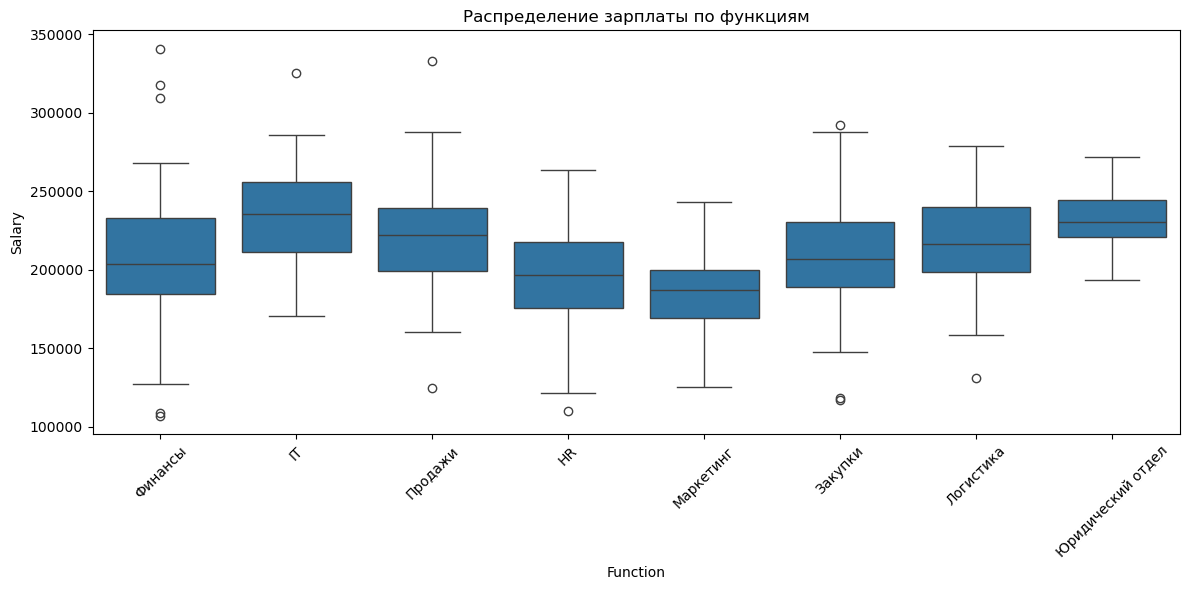

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Function', y='Salary', data=df)
plt.xticks(rotation=45)
plt.title("Распределение зарплаты по функциям")
plt.tight_layout()
plt.show()

Проверка однородности дисперсий (Levene’s test)

In [40]:
from scipy.stats import levene

groups = [group["Salary"].values for name, group in df.groupby("Function")]

stat, p = levene(*groups)
print(f"Levene’s test p-value: {p:.2f}")


Levene’s test p-value: 0.00


p < 0.05, то предположение о равенстве дисперсий нарушено. Значит, классическая ANOVA неприменима.

Альтернатива ANOVA — Welch ANOVA (устойчива к неравенству дисперсий и разным размерам групп)

In [30]:
import pingouin as pg

welch_results = pg.welch_anova(dv='Salary', between='Function', data=df)
print(welch_results)

     Source  ddof1       ddof2          F         p-unc       np2
0  Function      7  321.384147  45.945412  7.264295e-45  0.208016


p-значение < 0.05 следовательно, статистически значимые различия в зарплате между функциями действительно существуют.

F-статистика = 45.95. Сила различий довольно высокая: чем больше F, тем сильнее различие между средними.

η² = 0.208. Следовательно, функция объясняет около 20.8% разброса в зарплатах, что немало.

Выводы для бизнеса:

    Анализ показал, что функция сотрудника оказывает значительное влияние на уровень оплаты труда.
    Различия между функциями статистически значимы и практически значимы: по оценке, около 21% разброса зарплат объясняется функцией.

рассмотрим тест Games-Howell 

Попарное сравнение средних между всеми группами, чтобы определить, какие именно группы различаются

In [35]:

posthoc = pg.pairwise_gameshowell(dv='Salary', between='Function', data=df)
posthoc


,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,HR,IT,194457.016129,234663.650000,-40206.633871,4860.108126,-8.272786,122.515754,5.178746e-12,-1.271964
1,HR,Закупки,194457.016129,208906.417582,-14449.401453,4655.403120,-3.103792,183.934612,4.494443e-02,-0.432720
2,HR,Логистика,194457.016129,217467.169643,-23010.153514,3997.465910,-5.756185,233.928009,7.452059e-07,-0.744735
3,HR,Маркетинг,194457.016129,184511.795918,9945.220211,3650.422682,2.724402,243.106389,1.202807e-01,0.335752
4,HR,Продажи,194457.016129,220127.982301,-25670.966172,4087.128622,-6.280929,234.212946,4.521836e-08,-0.812911
5,HR,Финансы,194457.016129,207044.239669,-12587.223540,4524.937527,-2.781745,233.148077,1.046564e-01,-0.355158
6,HR,Юридический отдел,194457.016129,231552.830769,-37095.814640,3526.879819,-10.518026,186.967426,0.000000e+00,-1.334387
7,IT,Закупки,234663.650000,208906.417582,25757.232418,5364.157103,4.801730,138.029712,1.078941e-04,0.771913
8,IT,Логистика,234663.650000,217467.169643,17196.480357,4804.283184,3.579406,117.439610,1.143484e-02,0.575682
9,IT,Маркетинг,234663.650000,184511.795918,50151.854082,4519.622658,11.096469,99.940040,0.000000e+00,1.771488


Самые значимые различия между маркетингом и юридическим отделом, далее HR и IT.

Что касается практической значимости (hedges). Размер эффекта (на практике): 

        g = 0.2 → Маленький эффект

        g = 0.5 → Средний эффект

        g ≥ 0.8 → Большой эффект

    HR — IT: -1.27

    Маркетинг — Юр отдел: -1.91

    Маркетинг — Продажи: -1.23

Это говорит о реально крупных различиях, а не просто о статистических шумовых различиях. Соответственно, можно простоить тепловую карту и наглядно определеить функции, которые получают больше/меньше по сравнению с другими. 

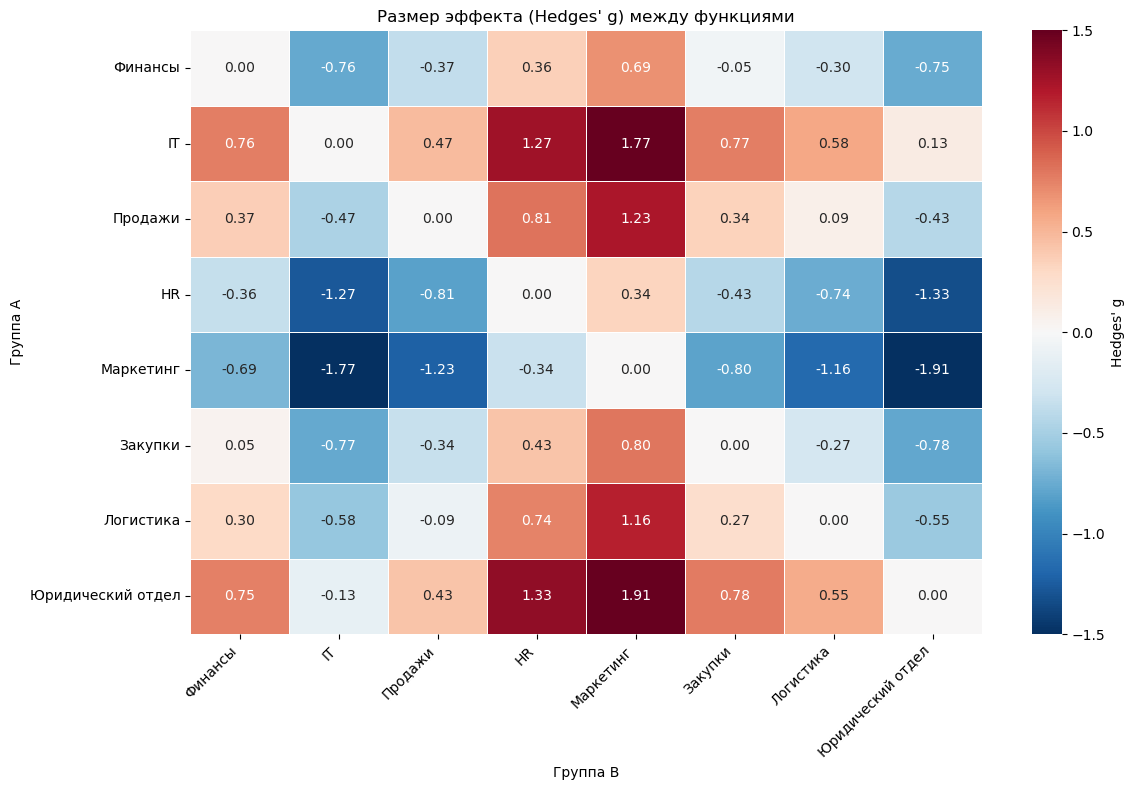

In [39]:

groups = df['Function'].unique()
n_groups = len(groups)
p_matrix = np.ones((n_groups, n_groups))      
hedges_matrix = np.zeros((n_groups, n_groups)) 
group_index = {group: idx for idx, group in enumerate(groups)}
for _, row in posthoc.iterrows():
    i = group_index[row['A']]
    j = group_index[row['B']]
    p_matrix[i, j] = row['pval']
    p_matrix[j, i] = row['pval']        
    hedges_matrix[i, j] = row['hedges']  
    hedges_matrix[j, i] = -row['hedges']  

plt.figure(figsize=(12, 8))
sns.heatmap(
    hedges_matrix,
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",  
    center=0,      
    vmin=-1.5,
    vmax=1.5,
    xticklabels=groups,
    yticklabels=groups,
    linewidths=0.5,
    cbar_kws={'label': "Hedges' g"}
)
plt.title("Размер эффекта (Hedges' g) между функциями")
plt.xlabel("Группа B")
plt.ylabel("Группа A")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Соответсвенно, помня про размер эффекта (на практике): 
        g = 0.2 → Маленький эффект

        g = 0.5 → Средний эффект

        g ≥ 0.8 → Большой эффект

        можно визулально выделить те функции, которые получают больше/меньше других. 

Рассмотрим пример, на котором можно наглядно рассмотреть выводы для бизнес-аудитории.

HR (A) vs. IT (B): g = -1.27
    Зарплаты в IT значительно ниже, чем в HR.

Можно попробовать обосновать такой разрыв, например, разная сложность задач или разная прибыльность компании. Если такой разрыв не оправдан, то необходимо скоректировать данный разрыв. 
